In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

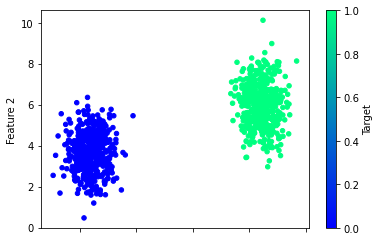

In [2]:
#Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

#Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
#use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
#create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

#Fit the scaler
X_scaler.fit(X_train)

#Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
#Create the keras sequential model
nn_model = tf.keras.models.Sequential()

2022-01-01 14:16:47.352606: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 2ms/step - loss: 0.4427 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3970 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 1.0000
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 1.0000
Epoch 92/100


<AxesSubplot:>

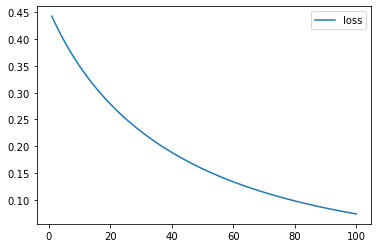

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

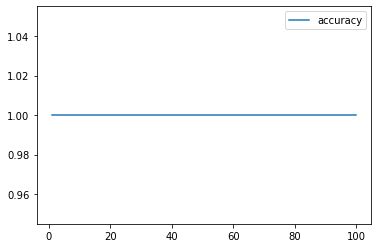

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
#Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0689 - accuracy: 1.0000 - 232ms/epoch - 29ms/step
Loss: 0.06889748573303223, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

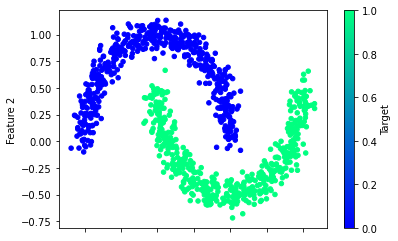

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1378 - accuracy: 0.4933
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9728 - accuracy: 0.5253
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8695 - accuracy: 0.5547
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8057 - accuracy: 0.5747
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7592 - accuracy: 0.5907
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7236 - accuracy: 0.6013
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.6160
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.6267
Epoch 9/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6512 - accuracy: 0.6373: 0s - loss: 0.6870 - accuracy: 0.
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0

24/24 [==============================] - 0s 4ms/step - loss: 0.2743 - accuracy: 0.8933
Epoch 83/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2736 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2721 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2716 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2710 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2706 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.8907
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.8920
Epoch 92/100


<AxesSubplot:>

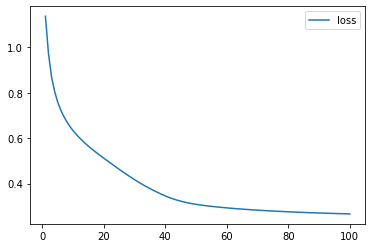

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

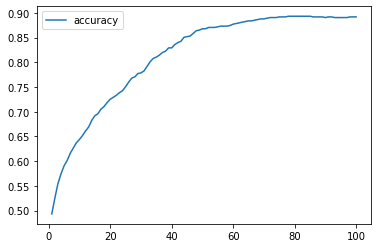

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7321 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5267
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6093
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7400
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7880
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.8213
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.8520
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.8707
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.8760
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8747
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9160
Epoch 83/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2004 - accuracy: 0.9133
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9147
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 0.9173
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9173
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9147
Epoch 88/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1957 - accuracy: 0.9173
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9173
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9173
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9173
Epoch 92/100
